Links: https://github.com/ddz16/TSFpaper, KAN4TSF => https://github.com/2448845600/EasyTSF

**Requirements:**
- The report should be roughly in the style of a blog post, including introduction, motivation, what you tried, what worked and didn’t work, etc. 
- Make sure you evaluate both the good and bad points of your approach.
- Show results of at least one experiment evaluating some aspect of or your entire approach, preferably showing error bars or some sort of statistical measure of the significance. Even if you didn't accomplish your goal, evaluate what you did do.
- A single well-analyzed experiment in a simple domain that compares clearly against a baseline is preferable to a shallow set of experiments across many domains.
- If any parameters are mentioned in the report, be sure to mention how you arrived at their values. Was it the first thing you tried? Trial and error? Roughly how many trials? etc.

# Abstract

# Introduction
The majority of deep learning architectures today are built using multi-layer perceptrons (MLP), which at its core, just consists of linear layers performing matrix multiplication. Even recent advances like Multi-head Attention are still just an extension of this. However, 6 months ago, a new type of neural network, dubbed Korov-Arnold Networks (KANs), started trending on Twitter because it promised to be a radically different approach to building neural networks, with the potential for greater expressivity and efficiency.

Akin to the Universal Approximation Theorem that underlies all MLPs [link to youtube video and wiki], the Kolmogorov–Arnold representation theorem similarly states that any function can be represented as a superposition of continuous single-variable functions. This is significant because it suggests that KANs, which are based on this theorem, may be capable of representing a wider range of functions than traditional MLPs. Furthermore, the theorem implies that this representation can be achieved using a relatively simple structure, potentially leading to more compact and efficient models.

<div style="text-align: center;">
  <img src="KANs.png" alt="KANs" width="600">
</div>

In traditional MLPs, the nodes perform the heavy lifting, combining inputs with learned weights and applying a nonlinear activation function to produce the output. The edges merely serve as conduits for passing information between nodes. In contrast, KANs flip this paradigm on its head. The edges take center stage, applying complex functions to the inputs before passing the results to the next node. The nodes themselves perform a simpler role, simply summing their inputs without any learned weights.

# Model

Write about the used models

# Motivation

This shift in computational focus has several potential advantages. By allowing the edges to perform complex transformations, KANs may be able to capture more intricate relationships between inputs and outputs. The learnable activation functions on the edges enable KANs to adapt better to complex data patterns compared to MLPs with fixed activation functions. Additionally, because the nodes in KANs do not require learned parameters, the total number of parameters in the network may be vastly reduced, leading to more efficient models that ideally are less prone to overfitting. Furthermore, due to their structure, KANs can be more interpretable than MLPs, which can be beneficial in applications where understanding the model's decision-making process is important.

Unfortunately, KANs also have some drawbacks. One major disadvantage is that KANs are considerably slower to train compared to MLPs, which have benefited from years of optimization and hardware acceleration. This increased computational cost can limit the scalability of KANs to larger and more complex tasks. Additionally, some research indicates [needs citation] that KANs may struggle to perform as well as MLPs on highly complex datasets, potentially limiting their applicability in certain scenarios.

However, KANs are still a relatively new and largely unexplored architecture. The experiments performed in the original KAN paper were limited to small-scale toy problems and boring classification tasks. Despite these limitations, the unique properties of KANs make them an intriguing candidate for time series analysis. Time series data often exhibits complex temporal dependencies and non-linear relationships that can be challenging for traditional MLPs to capture effectively. The learnable activation functions on the edges of KANs allow them to adapt to these intricate patterns more easily, potentially leading to improved performance in time series forecasting and anomaly detection tasks.

Although some preliminary research has been done on their effectiveness in time series analysis [1, https://arxiv.org/pdf/2405.08790] [2, https://arxiv.org/html/2408.11306v1], it remains inconclusive whether they are a promising candidate yet. 

# Experimentation

#### First working run:

```zsh
$ ./scripts/script.sh
Running experiment for seq_len=336, pred_len=18, seed=421 and feature=S (./results/MRO_336_18_S_channels_6_seed_421/logs/KAN.log):

Dataset: MRO.csv (1.6MB)
Train: 12226 time steps, ~50.0 years, start date 1962-01-02, end date 2011-12-16
Vali:  1556 time steps, ~6.3 years , start date 2011-12-19, end date 2018-03-21
Test:  1555 time steps, ~6.2 years , start date 2018-03-22, end date 2024-06-20

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.32353         MAE: 0.46235         SE: 0.39301          RRMSE: 25.71%        RMAE: 20.90%     (numpy)
Repeat               MSE: 0.07527         MAE: 0.18941         SE: 0.14305          RRMSE: 12.40%        RMAE: 8.56%      (numpy)
```

#### Second runs (longer `pred_len` and `seq_len`)
```zsh
Desktop/KANs-timeseries $ ./scripts/script.sh
Running experiment for seq_len=336, pred_len=60, seed=421 and feature=S (./results/MRO_336_60_S_channels_6_seed_421/logs/KAN.log):

Dataset: MRO.csv (1.6MB)
Train: 12184 time steps, ~50.0 years, start date 1962-01-02, end date 2011-12-16
Vali:  1514 time steps, ~6.3 years , start date 2011-12-19, end date 2018-03-21
Test:  1513 time steps, ~6.2 years , start date 2018-03-22, end date 2024-06-20

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.41582         MAE: 0.52733         SE: 0.65135          RRMSE: 29.45%        RMAE: 24.08%     (numpy)
Repeat               MSE: 0.22683         MAE: 0.34802         SE: 0.41335          RRMSE: 21.75%        RMAE: 15.90%     (numpy)


Running experiment for seq_len=336, pred_len=60, seed=421 and feature=S (./results/MRO_336_60_S_channels_6_seed_421/logs/DLinear.log):

...

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.28969         MAE: 0.40837         SE: 0.50525          RRMSE: 24.58%        RMAE: 18.65%     (numpy)
Repeat               MSE: 0.22683         MAE: 0.34802         SE: 0.41335          RRMSE: 21.75%        RMAE: 15.90%     (numpy)
```

```zsh
$ ./scripts/script.sh
Running experiment for seq_len=720, pred_len=120, seed=421 and feature=S (./results/MRO_720_120_S_channels_6_seed_421/logs/KAN.log):

Dataset: MRO.csv (1.6MB)
Train: 11740 time steps, ~50.0 years, start date 1962-01-02, end date 2011-12-16
Vali:  1454 time steps, ~6.3 years , start date 2011-12-19, end date 2018-03-21
Test:  1453 time steps, ~6.2 years , start date 2018-03-22, end date 2024-06-20

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.65365         MAE: 0.62645         SE: 1.15453          RRMSE: 37.70%        RMAE: 29.21%     (numpy)
Repeat               MSE: 0.39830         MAE: 0.47502         SE: 0.70808          RRMSE: 29.43%        RMAE: 22.15%     (numpy)

...

Running experiment for seq_len=720, pred_len=120, seed=421 and feature=S (./results/MRO_720_120_S_channels_6_seed_421/logs/DLinear.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.45854         MAE: 0.52043         SE: 0.70554          RRMSE: 31.58%        RMAE: 24.27%     (numpy)
Repeat               MSE: 0.39830         MAE: 0.47502         SE: 0.70808          RRMSE: 29.43%        RMAE: 22.15%     (numpy)
```

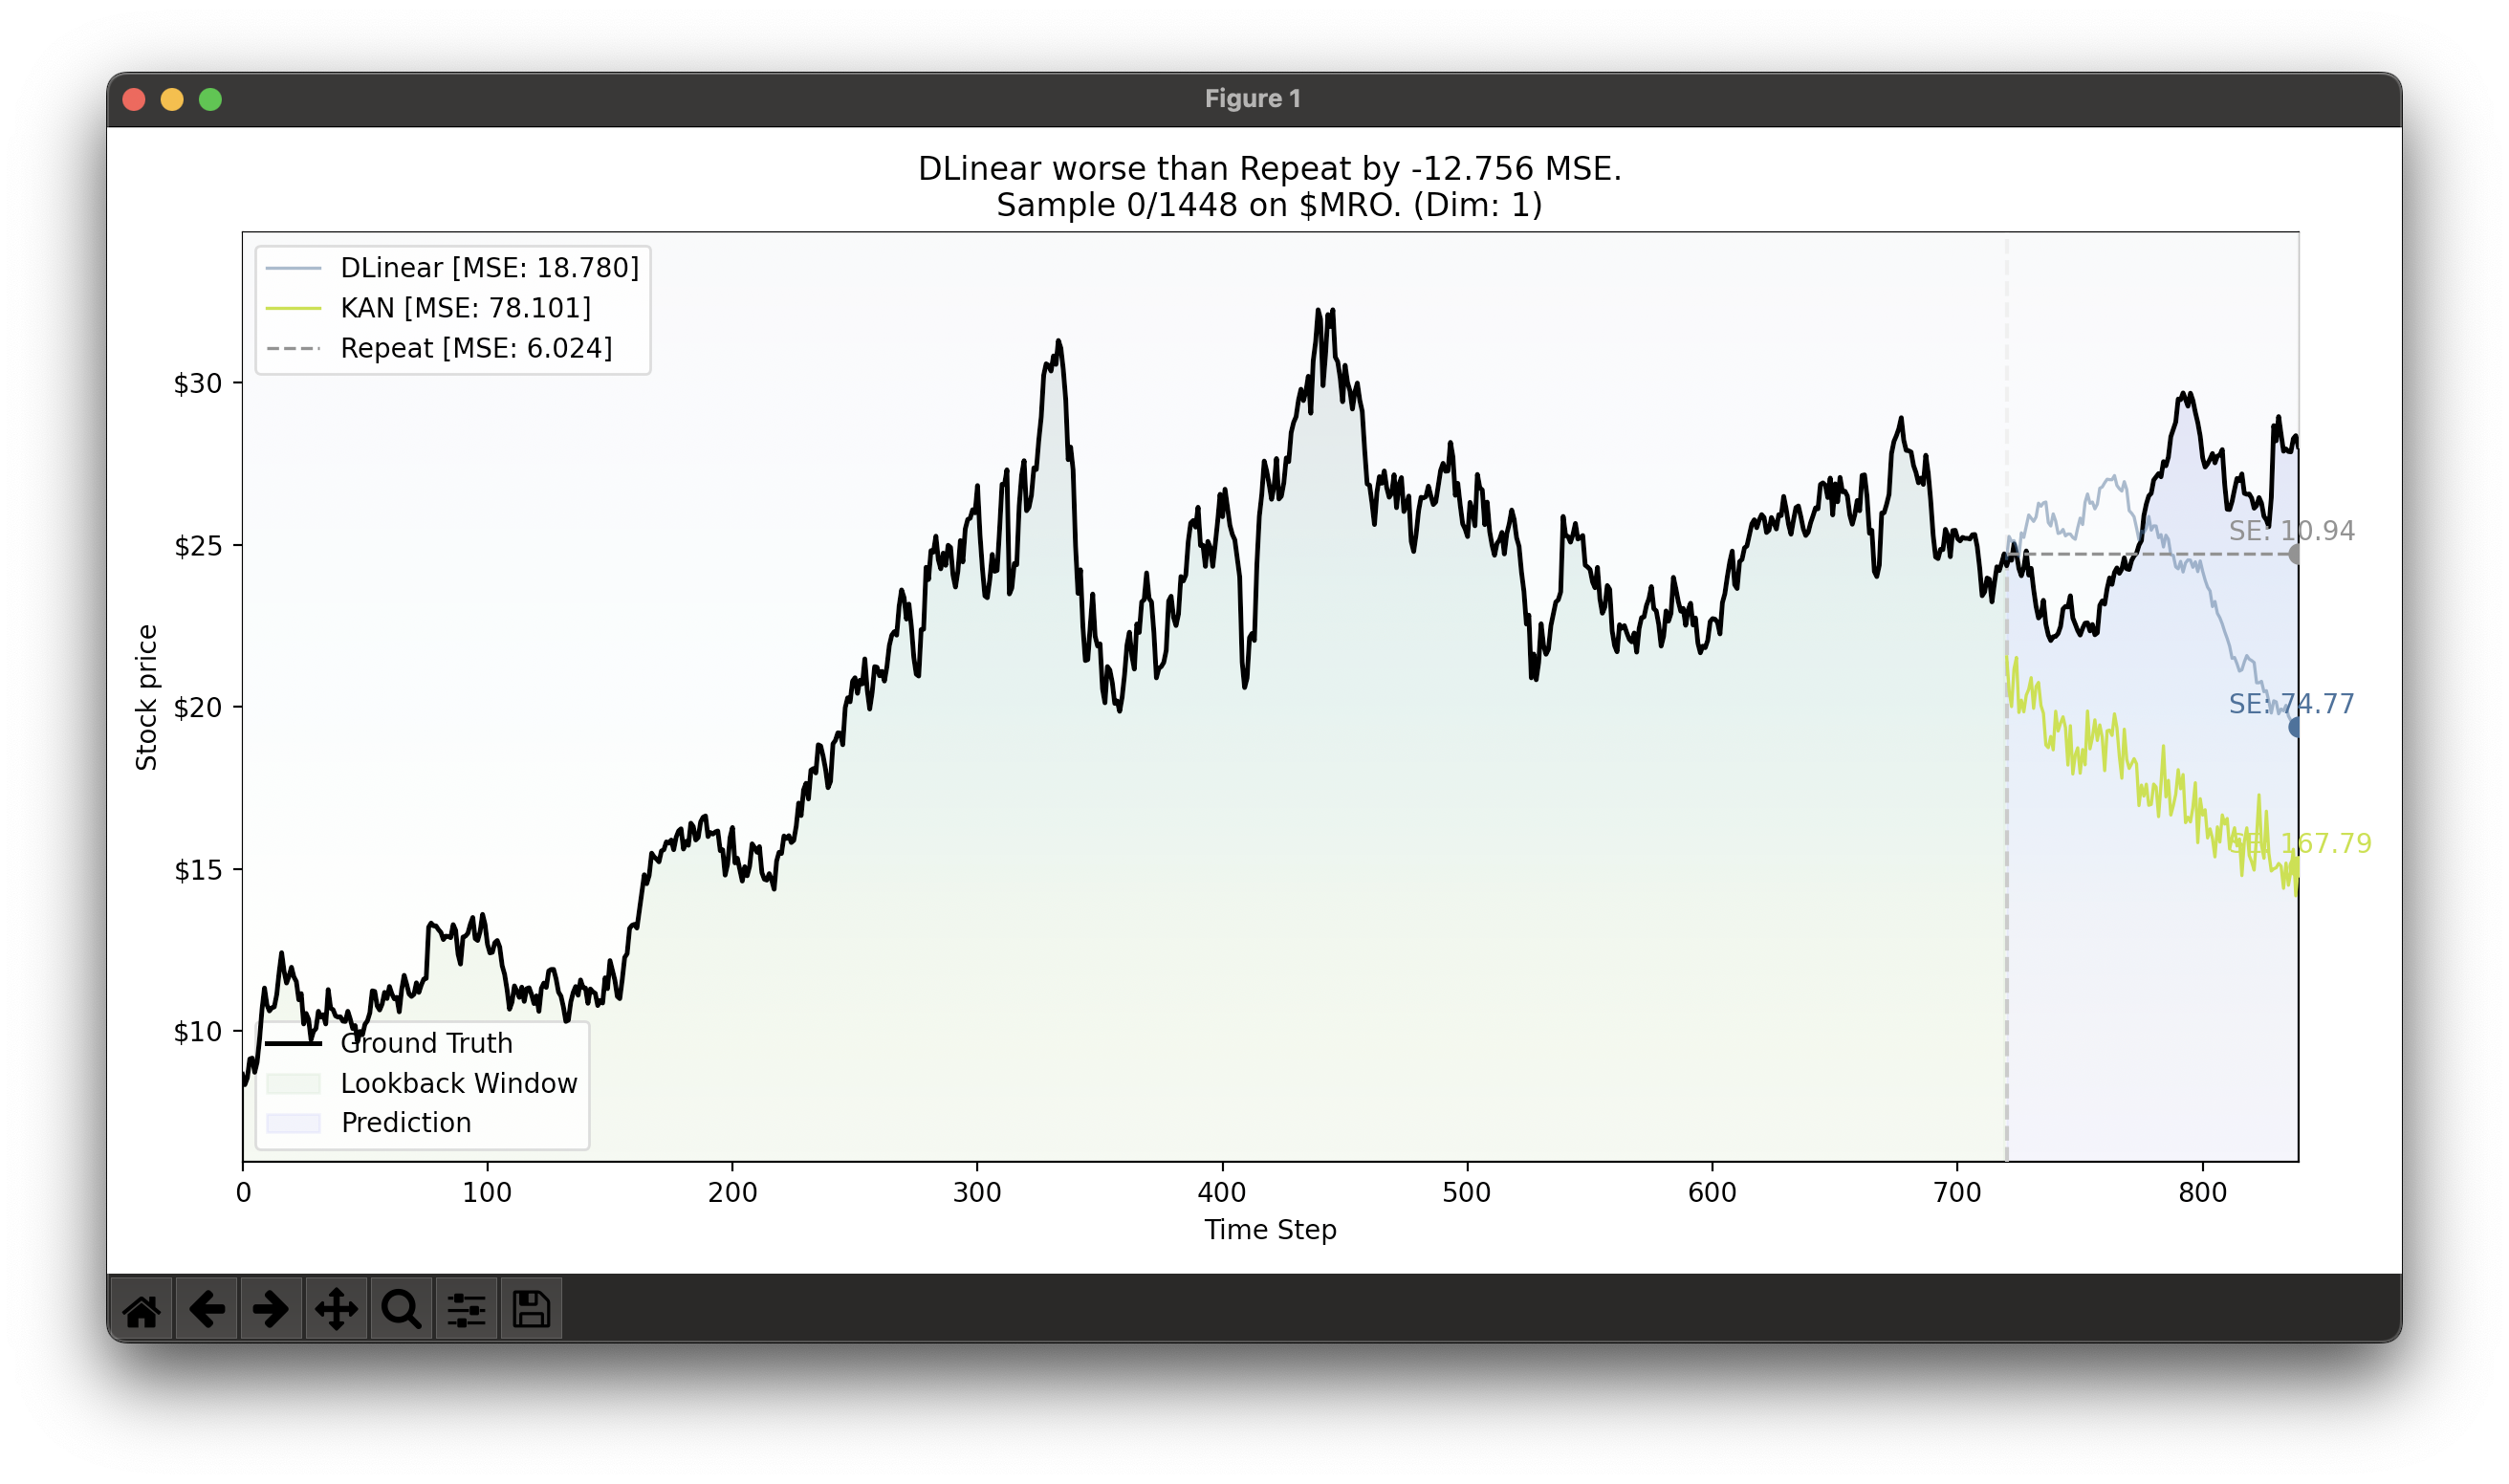

After seeing this result, we wanted to verify that our implementation in KAN.py was actually working as intended given that it performed so much worse than DLinear and seemed to not capture the underlying patterns we had hoped. The original implementation of the pioneering paper (https://github.com/KindXiaoming/pykan), has built-in model interpretation by using model.plot(), however, we used https://github.com/Blealtan/efficient-kan as the training time for the latter is about 10-20x slower. From `efficient-kan`:

> The performance issue of the original implementation is mostly because it needs to expand all intermediate variables to perform the different activation functions. For a layer with in_features input and out_features output, the original implementation needs to expand the input to a tensor with shape (batch_size, out_features, in_features) to perform the activation functions. However, all activation functions are linear combination of a fixed set of basis functions which are B-splines; given that, we can reformulate the computation as activate the input with different basis functions and then combine them linearly. This reformulation can significantly reduce the memory cost and make the computation a straightforward matrix multiplication, and works with both forward and backward pass naturally.

Unfortunately, that led down a hold rabbit-hold of verifying that `pykan` and `efficient-kan` are functionally equivalent.

To better showcase how KANs operate in our main experimental framework, we first created a controlled experiment in `notebooks/KANs_sliding_window_comparison.ipynb` that mirrors the sliding window approach (batches) used in `exp_main.py`. For each window, we take seq_len historical points as input (lookback window) and predict the next pred_len points (prediction window), then slide the window forward. This directly corresponds to how exp_main.py processes real-world datasets through data_provider/data_loader.py, where it creates batches of sliding windows for training, validation and testing. 

In this notebook, we also generated synthetic time series data with known patterns – a combination of sine waves at different frequencies and amplitudes plus exponential growth - in an attempt to mimic what could look like a random stock price on the surface. The hope was that the KANs would pick up on the underlying functions describing the actual movements in a way that MLP can't:
$$f(t) = \sin(\frac{2\pi t}{100}) + 2\sin(\frac{2\pi t}{20}) + 5\sin(\frac{2\pi t}{10}) + 8\sin(\frac{2\pi t}{5}) + 10\sin(\frac{2\pi t}{4}) + 1.0045^t + \epsilon_t$$

Although it was nice to confirm that both the PyKAN and EfficientKAN implementations looked similar in their predictions, their performance on even this synthetic data was concerning as they struggled to outperform simple baselines like Naive repeat let alone MLP (with same parameters as the KANs, 100x32x50) or DLinear.

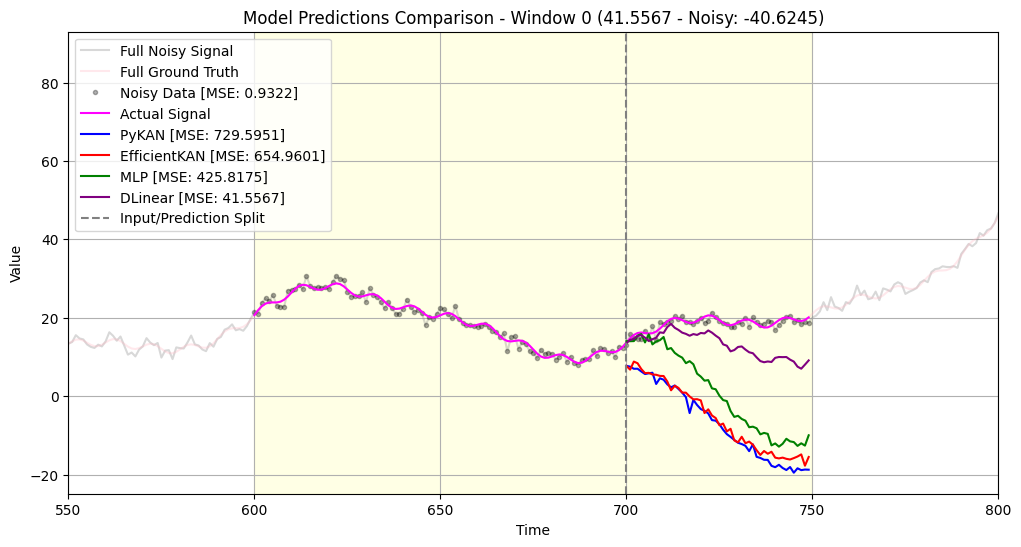

Given the KANs' underperformance from the previous notebook, we thought we'd start over very simply with just approximating some sine functions in `notebooks/KANs_simple_sin_approximation.ipynb`:

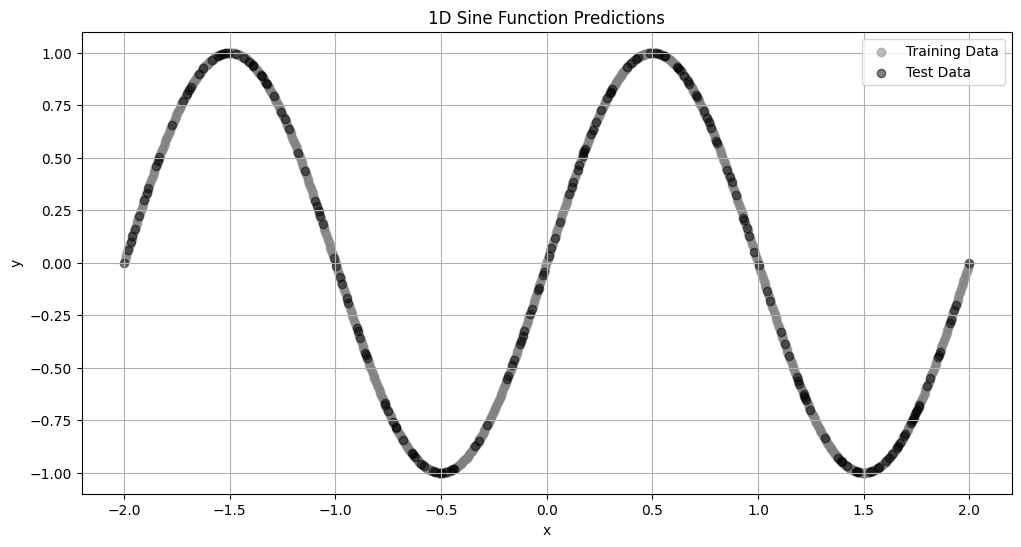

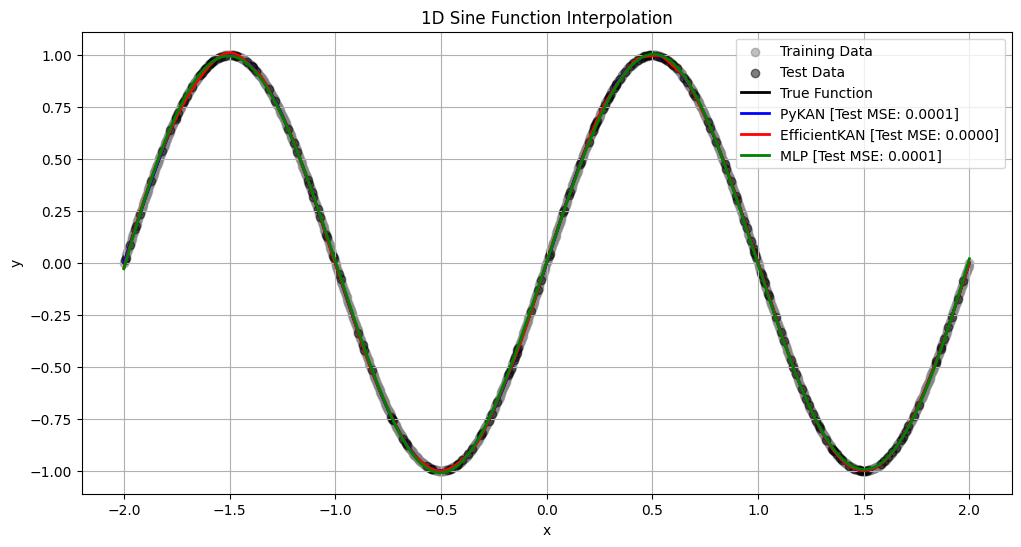

These basic experiments showed that KANs aren't uniquely better at interpolating 1D functions compared to an MLP of similar parameters, but they performed better preliminarily on 2D:

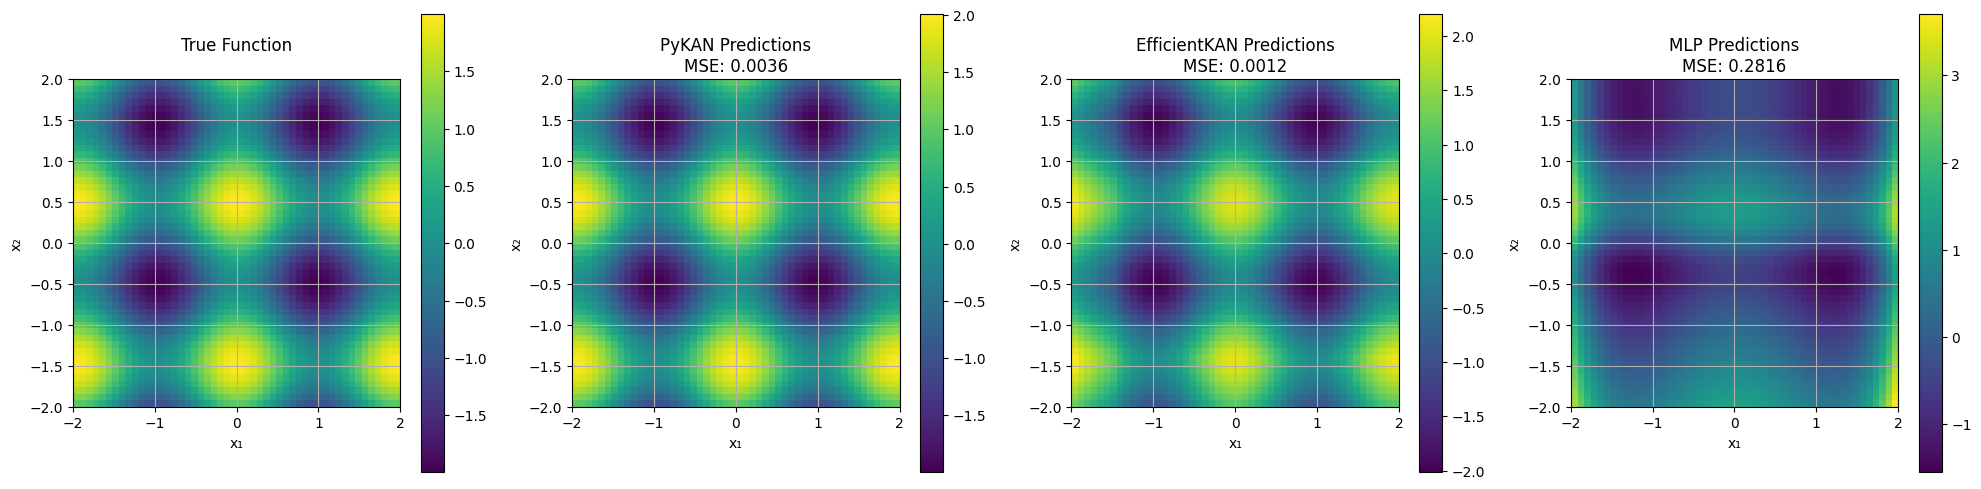

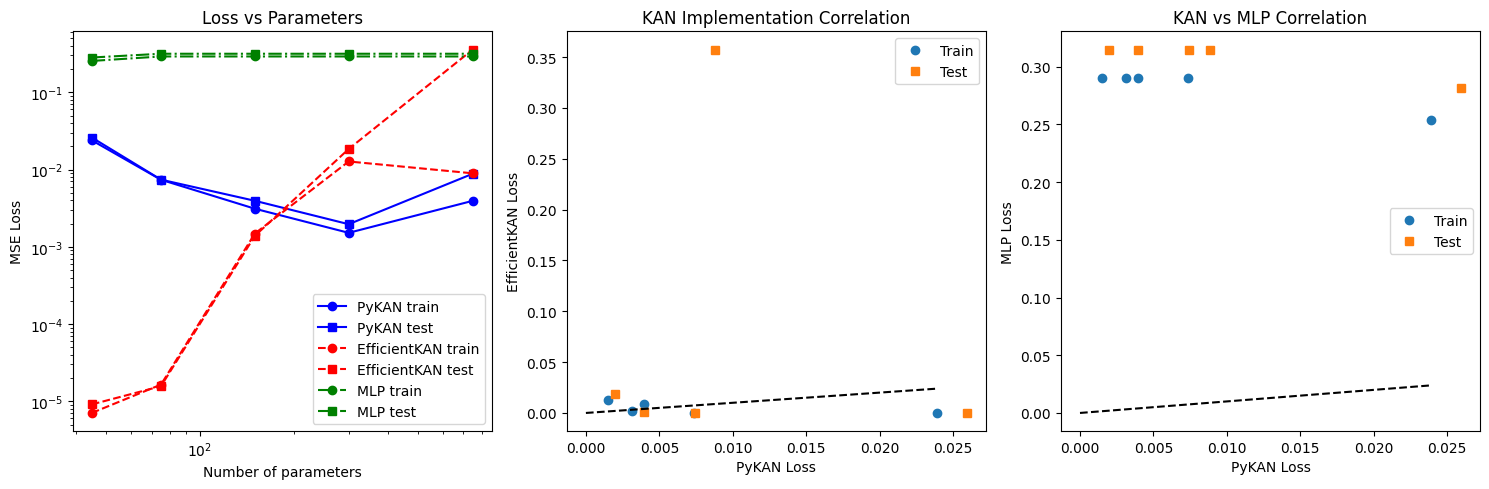

Unfortunately, it also seemed to indicate that `efficient-kan` might not be a completely faithful implementation of `pykan`, although the results are inconclusive.

Well, since it can learn to interpolate a 1D sine function, surely it must be able to extrapolate from one too? That's what we experimented with in `notebooks/KANs_simple_sin_extrapolation.ipynb`.

After analyzing both implementations' performance on basic sine wave interpolation and extrapolation, an interesting pattern emerged. When PyKAN fit the training data, it learned the following function through its automatic symbolic regression:

$0.1732\cos(0.5574x_1 + 3.6179) - 0.5703\cos(0.5634x_1 + 3.615) - 0.4688$

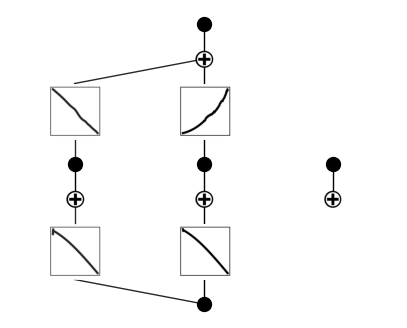

This result is particularly telling. Rather than capturing the true underlying function sin(πx), which would enable perfect extrapolation, the model learned a sum of cosines with similar frequencies (~0.56, roughly π/6) but different phases and amplitudes. While this combination allows the model to fit the training data well, it fails to generalize to the test region.

The plots illustrate this behavior clearly. Both PyKAN (blue) and EfficientKAN (red) achieve near-perfect fits on the training data left of x=0, but their predictions diverge significantly from the true sinusoidal pattern in the test region. PyKAN's prediction gradually flattens out, while EfficientKAN exhibits unstable oscillatory behavior with incorrect amplitude and frequency:


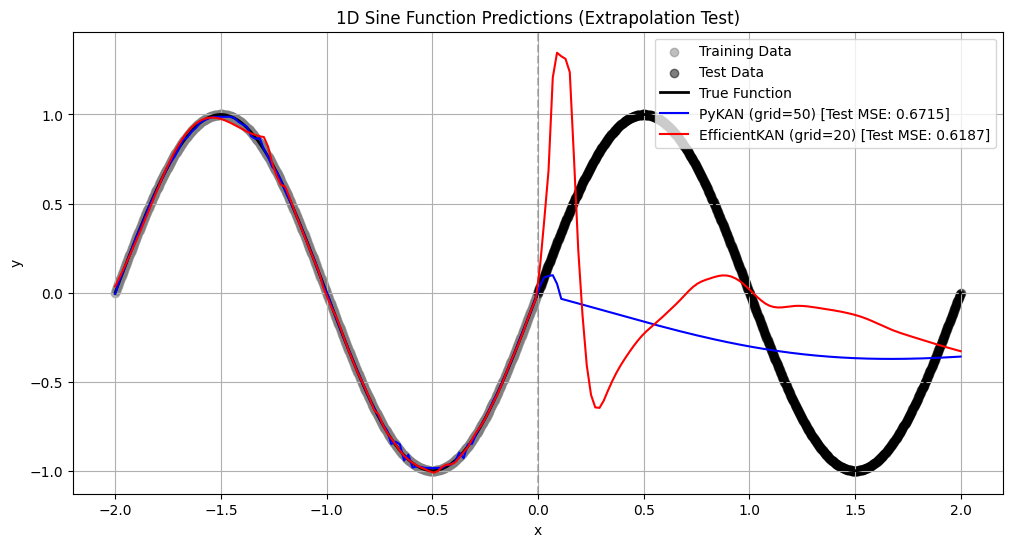

This suggests a fundamental limitation: despite their theoretical foundation in the Kolmogorov-Arnold representation theorem, KANs in practice tend to learn local approximations rather than discovering global patterns. The learned combination of cosines reveals that the model is essentially performing Fourier-like decomposition of the training data segment, without extracting the true periodic nature of the underlying function.

Even more concerning is that a simple MLP (green) struggles similarly with this basic extrapolation task, suggesting that the claimed advantages of KANs' edge-centric computation may not translate to better generalization capabilities, at least for periodic functions. Both architectures seem to be missing the forest for the trees, learning overly complex representations of what is fundamentally a simple periodic function.

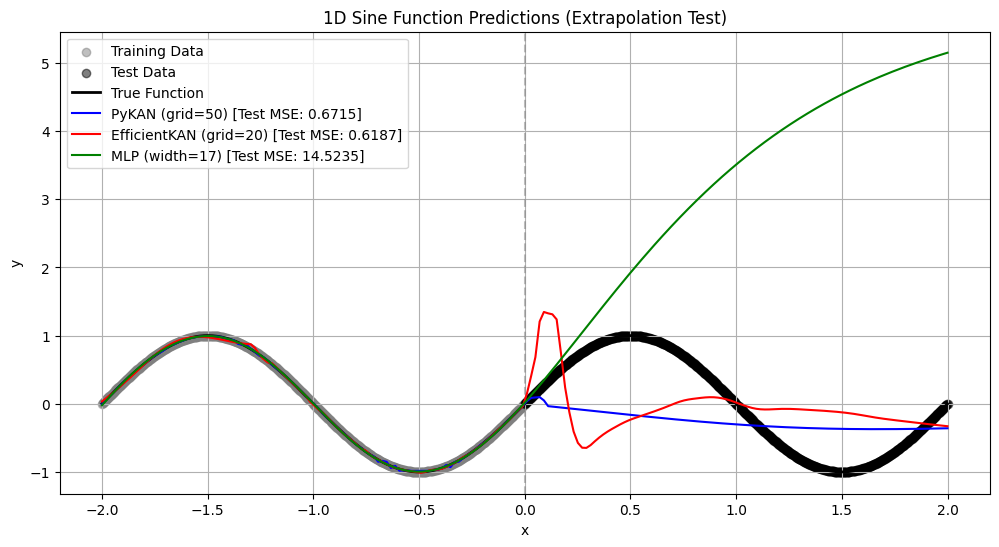

These results foreshadow potential challenges in applying KANs to time series forecasting, where identifying and extrapolating periodic patterns is often crucial for accurate predictions.

But this made us realize, why don't we train on the entire train dataset for real-life problems instead of using the sliding window approach?  The fundamental premise of KANs is their ability to represent complex functions through the Kolmogorov-Arnold representation theorem - essentially finding a single composite function that captures the underlying patterns in the data. By training on sliding windows, we might be forcing the model to learn many local approximations rather than discovering the global structure we hoped it would find.

With this motivation, we experimented with training KANs on the entire training dataset at once in notebooks/KANs_entire_train_comparison.ipynb. The intuition was that seeing all the data simultaneously would allow the KAN to potentially discover and encode the true generating function behind the time series, rather than trying to piece together predictions from local windows.

`notebooks/KANs_entire_train_comparison.ipynb`:

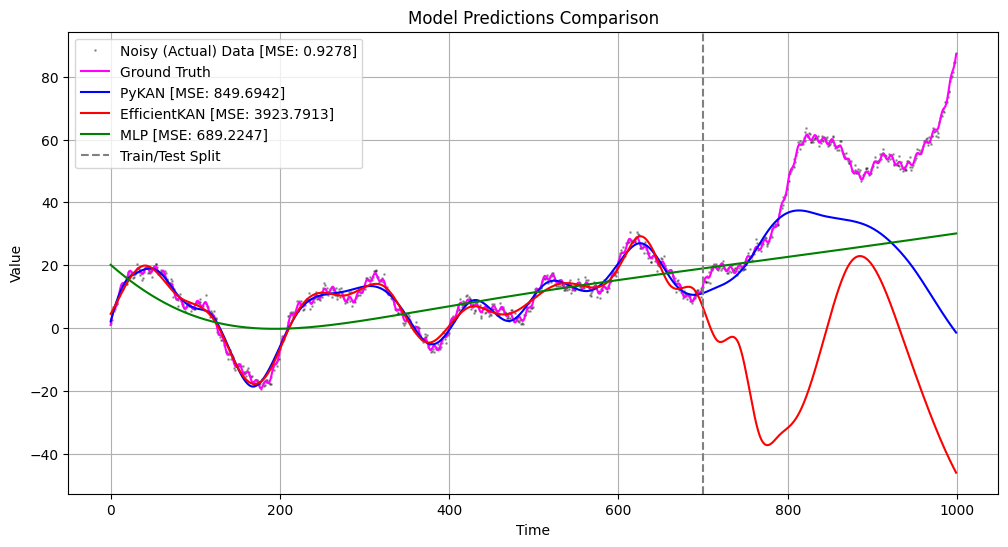

Unfortunately, even with this approach, KANs failed to outperform simpler baselines like MLPs. This suggests that the theoretical advantages of KANs - their ability to represent any continuous function through superposition of simpler functions - may not translate well to practical time series forecasting tasks. The challenge appears to be not just in the training methodology, but potentially in the fundamental architecture of KANs and their reliance on spline-based edge functions, which seem to favor local pattern matching over capturing global temporal dependencies.

This exploration, while unsuccessful, helped illuminate why KANs might be struggling with time series tasks despite their theoretical appeal. Further work could potentially explore modifications to the architecture that better preserve global context while maintaining the KAN's unique functional approximation properties.

Given that it sucked and can't even approximate a sin function (but neither can MLP, can DLinear though?), we conclude it's not applicable for forecasting tasks.

# Statistical Experiments (sliding window approach) / Methodology

Explain Repeat relevance (i.e. the true test to see if a dataset is truly random / predictable or not is if it can beat repeat)

Different `seq_len` impact:

```zsh
Desktop/KANs-timeseries $ ./scripts/script.sh
Running experiment for seq_len=50, pred_len=120, seed=0 and feature=S (./results/MRO_50_120_S_channels_6_seed_0/logs/DLinear.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.40549         MAE: 0.48515         SE: 0.72037          RRMSE: 29.62%        RMAE: 22.57%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=50, pred_len=120, seed=42 and feature=S (./results/MRO_50_120_S_channels_6_seed_42/logs/DLinear.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.40023         MAE: 0.47908         SE: 0.70820          RRMSE: 29.43%        RMAE: 22.29%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=50, pred_len=120, seed=420 and feature=S (./results/MRO_50_120_S_channels_6_seed_420/logs/DLinear.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.40379         MAE: 0.48076         SE: 0.71290          RRMSE: 29.56%        RMAE: 22.36%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=50, pred_len=120, seed=1337 and feature=S (./results/MRO_50_120_S_channels_6_seed_1337/logs/DLinear.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.40209         MAE: 0.48068         SE: 0.71496          RRMSE: 29.50%        RMAE: 22.36%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=50, pred_len=120, seed=2024 and feature=S (./results/MRO_50_120_S_channels_6_seed_2024/logs/DLinear.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.40264         MAE: 0.48112         SE: 0.71322          RRMSE: 29.52%        RMAE: 22.38%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)



Aggregated Statistics Across All Runs:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.40285 ±0.002    MAE: 0.48136 ±0.002    SE: 0.71393 ±0.004    RRMSE: 29.53%±0.06% RMAE: 22.39%±0.09%
Repeat               MSE: 0.39761 ±0.000    MAE: 0.47471 ±0.000    SE: 0.70651 ±0.000    RRMSE: 29.33%±0.00% RMAE: 22.08%±0.00%

Statistical Tests:
Paired t-test (MSE) p-value: 0.00393

Desktop/KANs-timeseries $ ./scripts/script.sh
Running experiment for seq_len=100, pred_len=120, seed=0 and feature=S (./results/MRO_100_120_S_channels_6_seed_0/logs/DLinear.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.40775         MAE: 0.48600         SE: 0.70827          RRMSE: 29.70%        RMAE: 22.61%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=100, pred_len=120, seed=42 and feature=S (./results/MRO_100_120_S_channels_6_seed_42/logs/DLinear.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.41127         MAE: 0.48734         SE: 0.71442          RRMSE: 29.83%        RMAE: 22.67%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=100, pred_len=120, seed=420 and feature=S (./results/MRO_100_120_S_channels_6_seed_420/logs/DLinear.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.42617         MAE: 0.50633         SE: 0.71432          RRMSE: 30.37%        RMAE: 23.55%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=100, pred_len=120, seed=1337 and feature=S (./results/MRO_100_120_S_channels_6_seed_1337/logs/DLinear.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.40982         MAE: 0.48925         SE: 0.70696          RRMSE: 29.78%        RMAE: 22.76%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=100, pred_len=120, seed=2024 and feature=S (./results/MRO_100_120_S_channels_6_seed_2024/logs/DLinear.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.41212         MAE: 0.48827         SE: 0.71140          RRMSE: 29.86%        RMAE: 22.71%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)



Aggregated Statistics Across All Runs:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.41343 ±0.007    MAE: 0.49144 ±0.008    SE: 0.71107 ±0.003    RRMSE: 29.91%±0.24% RMAE: 22.86%±0.35%
Repeat               MSE: 0.39761 ±0.000    MAE: 0.47471 ±0.000    SE: 0.70651 ±0.000    RRMSE: 29.33%±0.00% RMAE: 22.08%±0.00%

Statistical Tests:
Paired t-test (MSE) p-value: 0.00843

Desktop/KANs-timeseries $ ./scripts/script.sh 
Running experiment for seq_len=252, pred_len=120, seed=0 and feature=S (./results/MRO_252_120_S_channels_6_seed_0/logs/DLinear.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.40738         MAE: 0.48691         SE: 0.68593          RRMSE: 29.69%        RMAE: 22.65%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=252, pred_len=120, seed=42 and feature=S (./results/MRO_252_120_S_channels_6_seed_42/logs/DLinear.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.40603         MAE: 0.48488         SE: 0.68276          RRMSE: 29.64%        RMAE: 22.56%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=252, pred_len=120, seed=420 and feature=S (./results/MRO_252_120_S_channels_6_seed_420/logs/DLinear.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.40569         MAE: 0.48456         SE: 0.68500          RRMSE: 29.63%        RMAE: 22.54%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=252, pred_len=120, seed=1337 and feature=S (./results/MRO_252_120_S_channels_6_seed_1337/logs/DLinear.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.41377         MAE: 0.48991         SE: 0.69434          RRMSE: 29.92%        RMAE: 22.79%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=252, pred_len=120, seed=2024 and feature=S (./results/MRO_252_120_S_channels_6_seed_2024/logs/DLinear.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.40714         MAE: 0.48562         SE: 0.68709          RRMSE: 29.68%        RMAE: 22.59%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)



Aggregated Statistics Across All Runs:
--------------------------------------------------------------------------------------------------------------------------------------------
DLinear              MSE: 0.40800 ±0.003    MAE: 0.48638 ±0.002    SE: 0.68702 ±0.004    RRMSE: 29.71%±0.11% RMAE: 22.63%±0.09%
Repeat               MSE: 0.39761 ±0.000    MAE: 0.47471 ±0.000    SE: 0.70651 ±0.000    RRMSE: 29.33%±0.00% RMAE: 22.08%±0.00%

Statistical Tests:
Paired t-test (MSE) p-value: 0.00215
```

```zsh
Desktop/KANs-timeseries $ ./scripts/script.sh
Running experiment for seq_len=50, pred_len=120, seed=0 and feature=S (./results/MRO_50_120_S_channels_6_seed_0/logs/KAN.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.50535         MAE: 0.54016         SE: 0.99830          RRMSE: 33.07%        RMAE: 25.13%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=50, pred_len=120, seed=42 and feature=S (./results/MRO_50_120_S_channels_6_seed_42/logs/KAN.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.47849         MAE: 0.52793         SE: 0.94082          RRMSE: 32.18%        RMAE: 24.56%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=50, pred_len=120, seed=420 and feature=S (./results/MRO_50_120_S_channels_6_seed_420/logs/KAN.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.50012         MAE: 0.53898         SE: 1.01756          RRMSE: 32.90%        RMAE: 25.07%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=50, pred_len=120, seed=1337 and feature=S (./results/MRO_50_120_S_channels_6_seed_1337/logs/KAN.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.50317         MAE: 0.53999         SE: 1.00886          RRMSE: 33.00%        RMAE: 25.12%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=50, pred_len=120, seed=2024 and feature=S (./results/MRO_50_120_S_channels_6_seed_2024/logs/KAN.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.47258         MAE: 0.53403         SE: 0.81935          RRMSE: 31.98%        RMAE: 24.84%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)



Aggregated Statistics Across All Runs:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.49194 ±0.014    MAE: 0.53622 ±0.005    SE: 0.95698 ±0.074    RRMSE: 32.63%±0.45% RMAE: 24.94%±0.22%
Repeat               MSE: 0.39761 ±0.000    MAE: 0.47471 ±0.000    SE: 0.70651 ±0.000    RRMSE: 29.33%±0.00% RMAE: 22.08%±0.00%

Statistical Tests:
Paired t-test (MSE) p-value: 0.00016

Desktop/KANs-timeseries $ ./scripts/script.sh
Running experiment for seq_len=100, pred_len=120, seed=0 and feature=S (./results/MRO_100_120_S_channels_6_seed_0/logs/KAN.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.58964         MAE: 0.60683         SE: 1.18621          RRMSE: 35.72%        RMAE: 28.23%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=100, pred_len=120, seed=42 and feature=S (./results/MRO_100_120_S_channels_6_seed_42/logs/KAN.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.57927         MAE: 0.59946         SE: 1.09503          RRMSE: 35.40%        RMAE: 27.89%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=100, pred_len=120, seed=420 and feature=S (./results/MRO_100_120_S_channels_6_seed_420/logs/KAN.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.57933         MAE: 0.59721         SE: 1.19934          RRMSE: 35.41%        RMAE: 27.78%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=100, pred_len=120, seed=1337 and feature=S (./results/MRO_100_120_S_channels_6_seed_1337/logs/KAN.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.57166         MAE: 0.59236         SE: 1.15527          RRMSE: 35.17%        RMAE: 27.55%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=100, pred_len=120, seed=2024 and feature=S (./results/MRO_100_120_S_channels_6_seed_2024/logs/KAN.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.54143         MAE: 0.58410         SE: 1.01317          RRMSE: 34.23%        RMAE: 27.17%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)



Aggregated Statistics Across All Runs:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.57227 ±0.016    MAE: 0.59599 ±0.008    SE: 1.12980 ±0.069    RRMSE: 35.19%±0.51% RMAE: 27.72%±0.35%
Repeat               MSE: 0.39761 ±0.000    MAE: 0.47471 ±0.000    SE: 0.70651 ±0.000    RRMSE: 29.33%±0.00% RMAE: 22.08%±0.00%

Statistical Tests:
Paired t-test (MSE) p-value: 0.00003

Desktop/KANs-timeseries $ ./scripts/script.sh
Running experiment for seq_len=252, pred_len=120, seed=0 and feature=S (./results/MRO_252_120_S_channels_6_seed_0/logs/KAN.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.76281         MAE: 0.70677         SE: 1.43292          RRMSE: 40.63%        RMAE: 32.88%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=252, pred_len=120, seed=42 and feature=S (./results/MRO_252_120_S_channels_6_seed_42/logs/KAN.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.70311         MAE: 0.68238         SE: 1.34826          RRMSE: 39.01%        RMAE: 31.74%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=252, pred_len=120, seed=420 and feature=S (./results/MRO_252_120_S_channels_6_seed_420/logs/KAN.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.77102         MAE: 0.68964         SE: 1.57267          RRMSE: 40.85%        RMAE: 32.08%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=252, pred_len=120, seed=1337 and feature=S (./results/MRO_252_120_S_channels_6_seed_1337/logs/KAN.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.76028         MAE: 0.69311         SE: 1.28591          RRMSE: 40.56%        RMAE: 32.24%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)


Running experiment for seq_len=252, pred_len=120, seed=2024 and feature=S (./results/MRO_252_120_S_channels_6_seed_2024/logs/KAN.log):

Prediction Metrics:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.73069         MAE: 0.69853         SE: 1.42135          RRMSE: 39.76%        RMAE: 32.49%     (numpy)
Repeat               MSE: 0.39761         MAE: 0.47471         SE: 0.70651          RRMSE: 29.33%        RMAE: 22.08%     (numpy)



Aggregated Statistics Across All Runs:
--------------------------------------------------------------------------------------------------------------------------------------------
KAN                  MSE: 0.74558 ±0.025    MAE: 0.69409 ±0.008    SE: 1.41222 ±0.096    RRMSE: 40.16%±0.68% RMAE: 32.29%±0.38%
Repeat               MSE: 0.39761 ±0.000    MAE: 0.47471 ±0.000    SE: 0.70651 ±0.000    RRMSE: 29.33%±0.00% RMAE: 22.08%±0.00%

Statistical Tests:
Paired t-test (MSE) p-value: 0.00001

Desktop/KANs-timeseries $ 
```

# Further Work

After reviewing the following papers from https://github.com/ddz16/TSFpaper?tab=readme-ov-file:

<h2 style="display: inline;">KAN (Kolmogorov–Arnold Network).</h2>

Date|Method|Conference|Paper Title and Paper Interpretation (In Chinese)|Code
-----|----|-----|-----|-----
| 24-05-12 | [TKAN](https://arxiv.org/abs/2405.07344) | Arxiv 2024 | TKAN: Temporal Kolmogorov-Arnold Networks | [tkan](https://github.com/remigenet/tkan) |
| 24-05-14 | [KAN](https://arxiv.org/abs/2405.08790) | Arxiv 2024 | Kolmogorov-Arnold Networks (KANs) for Time Series Analysis | None |
| 24-06-04 | [TKAT](https://arxiv.org/abs/2406.02486) | Arxiv 2024 | A Temporal Kolmogorov-Arnold Transformer for Time Series Forecasting | [TKAT](https://github.com/remigenet/TKAT) |
| 24-06-04 | [MT-KAN](https://arxiv.org/abs/2406.02496) | Arxiv 2024 | Kolmogorov-Arnold Networks for Time Series: Bridging Predictive Power and Interpretability | None |
| 24-08-21 | [KAN4TSF](https://arxiv.org/abs/2408.11306) | Arxiv 2024 | KAN4TSF: Are KAN and KAN-based models Effective for Time Series Forecasting? | [kan4tsf](https://github.com/2448845600/kan4tsf) |
| 24-10-13 | [WormKAN](https://arxiv.org/abs/2410.10041) | NIPSW 2024 | Are KAN Effective for Identifying and Tracking Concept Drift in Time Series? | None |
| 24-10-19 | [HiPPO-KAN](https://arxiv.org/abs/2410.14939) | Arxiv 2024 | HiPPO-KAN: Efficient KAN Model for Time Series Analysis | None |

The one that shows the most promising results of the seven above is KAN4TSF, which uses a mixture-of-experts of KANs approach and claims to achieve state of the art results on a variety of benchmarks and datasets, however, we haven't verified their approach yet.

We would also like to explore the idea of training one big symbolic function to represent both the training and test data further as this is what seems to make the most sense intuitively if considering the fundamental "breakthrough" of KANs.

# Conclusion

Conclude the results...

While working, I was listening to https://www.youtube.com/watch?v=cDM3CMtBUFw 54:00-55:00 ... 

Something about: The core issue is that splines (which KANs built on) are inherently local approximators, making them great for interpolation but poor at extrapolating global patterns like periodicity.